In [ ]:
# GENERATE PRD

import sys
import os
import json

# Add the project's root directory to the Python path to ensure 'utils' can be imported.
try:
    # Assumes the notebook is in 'labs/Day_01_.../'
    project_root = os.path.abspath(os.path.join(os.getcwd(), '..', '..'))
except IndexError:
    # Fallback for different execution environments
    project_root = os.path.abspath(os.path.join(os.getcwd()))

if project_root not in sys.path:
    sys.path.insert(0, project_root)

from utils import setup_llm_client, get_completion, save_artifact, load_artifact, render_plantuml_diagram

# Initialize the LLM client. You can change the model here.
client, model_name, api_provider = setup_llm_client(model_name="gemini-2.5-pro")

# Generate PRD
prd_prompt = f"""You are a product manager tasked with creating a Product Requirements Document (PRD) for a web-based RAG-Powered Documentation Chatbot. 
This chatbot uses a Retrieval-Augmented Generation (RAG) backend to answer questions about the official CUDA C++ Programming Guide, 
specifically to help new developers learn and solve problems related to CUDA programming.

Please provide a detailed PRD that includes the following sections:

1. **Introduction**: Overview of the project and its objectives.
2. **User Stories**: Describe the key user stories that the chatbot should support.
3. **Functional Requirements**: We will have these features: Natural language query handling, retrieval of relevant information from a knowledge source, 
and generation of concise, user-friendly responses.
5. **Success Metrics**: Define how the success of the chatbot will be measured (e.g., user satisfaction, accuracy of answers, engagement, learning outcomes).

Make the PRD clear, actionable, and tailored for a technical audience interested in CUDA development.
"""

simple_prd_output = get_completion(prd_prompt, client, model_name, api_provider)
print(simple_prd_output)
save_artifact(simple_prd_output, "artifacts/prd.md")

✅ LLM Client configured: Using 'gemini' with model 'gemini-2.5-pro'
Of course. Here is a detailed Product Requirements Document (PRD) for the RAG-Powered CUDA Documentation Chatbot.

---

### **Product Requirements Document (PRD): CUDA C++ Documentation Chatbot**

**Project Name:** CUDA-Assist
**Version:** 1.0
**Status:** Draft
**Author:** [Your Name/Role], Product Manager
**Date:** October 26, 2023

---

### 1. Introduction

#### 1.1. Overview
This document outlines the product requirements for **CUDA-Assist**, a web-based, conversational AI assistant designed to help developers learn and use the CUDA C++ parallel computing platform. The core of this product is a Retrieval-Augmented Generation (RAG) system that leverages the official **NVIDIA CUDA C++ Programming Guide** as its single source of truth.

#### 1.2. Problem Statement
The CUDA C++ Programming Guide is the definitive resource for parallel programming on NVIDIA GPUs. However, its comprehensive nature makes it dense and diffi

--- Generating Component Diagram ---

--- Generated PlantUML Code ---
@startuml
!theme materia

title RAG-Powered Documentation Chatbot - Component Diagram

' Define Components
component [User Interface (UI)] <<Web Frontend>> as UI
component "Backend Service" <<API Server>> as Backend
database "Database / Document Store" as DB {
  [Knowledge Base\n(e.g., CUDA Docs)] as Docs
  [Chat History] as History
}
component "Language Model (LLM)" <<External Service>> as LLM

' Define Relationships
UI -right-> Backend : 1. Sends User Query (HTTP/S)

Backend -down-> DB : 2. Retrieves relevant documents\n& stores/retrieves chat history

Backend -right-> LLM : 3. Sends prompt (query + context)\nfor response generation

LLM .left.> Backend : 4. Returns generated response

Backend .left.> UI : 5. Streams final response for display

@enduml
✅ Diagram rendered and saved to: artifacts/component_diagram.png


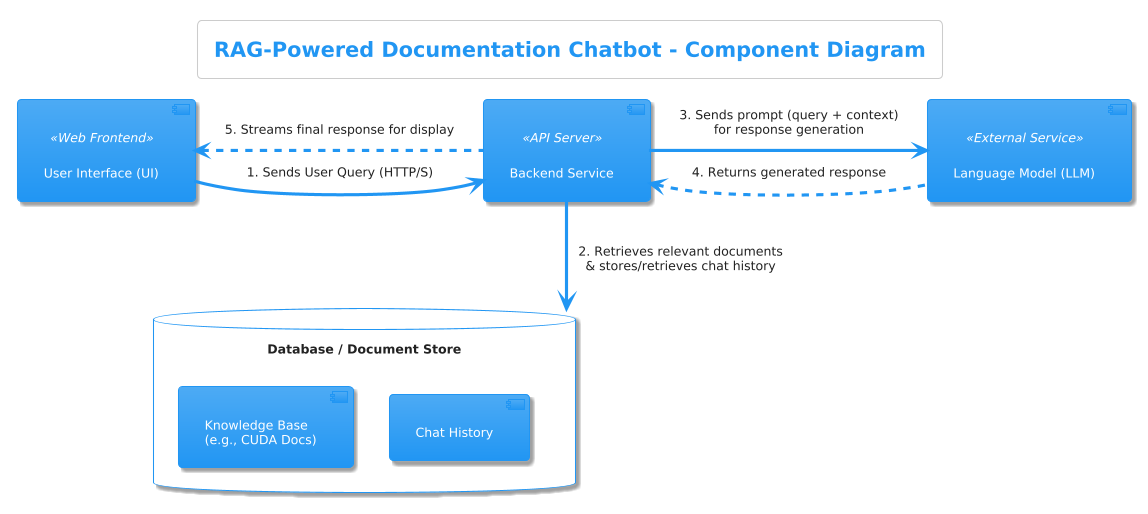

In [9]:
# ARCHITECTURAL DOCUMENT
from utils import render_plantuml_diagram, load_artifact, clean_llm_output

component_diagram_prompt = """
You are an expert system architect. Generate PlantUML code for a component diagram illustrating 
the architecture of a web-based RAG-Powered Documentation Chatbot.

Components:

1. User Interface (UI): The web front-end where users interact with the chatbot.

2. Backend Service (API Server): Handles requests from the UI, processes queries, and coordinates retrieval and response generation.

3. Database or Document Store: Stores the knowledge base (e.g., CUDA documentation) and chat history.

Relationships:
1. The User Interface (UI) sends user queries to the Backend Service.
2. The Backend Service receives queries, interacts with the Database/Document Store to retrieve relevant information, and calls the language model for response generation.
3. The Backend Service returns the generated response to the UI for display to the user.
4. The Database/Document Store is accessed by the Backend Service for storing chat history, retrieving documents, and managing knowledge sources.

Output only the raw PlantUML code inside a markdown block.
"""

print("--- Generating Component Diagram ---")
component_puml_raw = get_completion(component_diagram_prompt, client, model_name, api_provider)
component_puml = clean_llm_output(component_puml_raw, language='plantuml')

print("\n--- Generated PlantUML Code ---")
print(component_puml)

# Render the diagram

if component_puml:
    render_plantuml_diagram(component_puml, "artifacts/component_diagram.png")

In [17]:
client, model_name, api_provider = setup_llm_client(model_name="gemini-2.5-pro")

adr_template_prompt = """ You are an expert in software architecture and design. 
Create a markdown template for an Architectural Decision Record (ADR) in markdown format.
The template should include the following sections:
Title: A concise title for the decision.
Status: The status of the decision (e.g., Proposed, Accepted, Deprecated).
Context: The context or background that led to this decision.
Decision: The actual decision that was made.
Consequences: The consequences or implications of the decision.

Output should only be the markdown template without any additional text or explanations."""

print("--- Generating ADR Template ---")
adr_template_content = get_completion(adr_template_prompt, client, model_name, api_provider)
print(adr_template_content)

# Save the artifact
if adr_template_content:
    save_artifact(adr_template_content, "templates/adr_template.md")

db_research_prompt = """ Act as an unbiased expert in database systems. We are building a web-based RAG-Powered Documentation Chatbot that will use a vector database to store and retrieve information from the CUDA C++ Programming Guide.
Use this PRD as context:
{simple_prd_output}

Objectively compare and contrast two technical options: **"Using Postgres "** versus **"Using FAISS"**.
Output should only include the comparison and not include any additional text or explanations."""

print("--- Researching Database Options ---")
db_research_output = get_completion(db_research_prompt, client, model_name, api_provider)
print(db_research_output)

adr_template = load_artifact("templates/adr_template.md")

# TODO: Write a prompt to synthesize the final ADR.
synthesis_prompt = f"""
You are a Staff Engineer and an expert in software architecture and design.
Using the following ADR template:

{adr_template}

And the research findings:

{db_research_output}

Synthesize the final ADR. Make sure to document the decision-making process clearly, including the context, decision, and consequences.
Ensure that the ADR is well-structured and follows best practices for documenting architectural decisions.
Output should only include the comparison and not include any additional text or explanations."""


print("--- Synthesizing Final ADR ---")
if adr_template and 'db_research_output' in locals() and db_research_output:
    final_adr = get_completion(synthesis_prompt, client, model_name, api_provider)
    print(final_adr)
    save_artifact(final_adr, "artifacts/adr.md")
else:
    print("Skipping ADR synthesis because template or research is missing.")


✅ LLM Client configured: Using 'gemini' with model 'gemini-2.5-pro'
--- Generating ADR Template ---
```markdown
# <Title of ADR>

**Status:** <Proposed | Accepted | Deprecated | Superseded>

## Context

<!--
Describe the problem, the driving forces, and the constraints that led to this decision.
This section should set the stage and explain why this decision is necessary.
-->

## Decision

<!--
Clearly and concisely describe the decision that was made.
This should be a direct statement, e.g., "We will adopt [Technology X] for [Purpose Y]."
-->

## Consequences

<!--
Describe the results and implications of this decision, both positive and negative.
This helps future readers understand the trade-offs and impact.
-->

*   **Positive:**
    *   ...

*   **Negative:**
    *   ...

*   **Neutral/Risks:**
    *   ...
```
✅ Successfully saved artifact to: templates/adr_template.md
--- Researching Database Options ---
| Feature | Postgres (with pgvector extension) | FAISS (as a library) |
| :-